# Gluten Detector with Paddle OCR

#  Install Dependencies

In [1]:
!python -m pip install paddlepaddle-gpu==2.0.0 -i https://mirror.baidu.com/pypi/simple

Looking in indexes: https://mirror.baidu.com/pypi/simple
ERROR: Could not find a version that satisfies the requirement paddlepaddle-gpu==2.0.0 (from versions: 2.1.0, 2.1.1, 2.1.2, 2.1.3, 2.2.0rc0, 2.2.0, 2.2.1, 2.2.2, 2.3.0rc0, 2.3.0, 2.3.1)
ERROR: No matching distribution found for paddlepaddle-gpu==2.0.0
You should consider upgrading via the '/home/vincent/miniconda3/bin/python -m pip install --upgrade pip' command.


In [2]:
!pip install paddleocr

     |████████████████████████████████| 334 kB 3.0 MB/s            
     |████████████████████████████████| 948 kB 1.7 MB/s            
     |████████████████████████████████| 7.0 MB 2.1 MB/s            
     |████████████████████████████████| 14.0 MB 2.2 MB/s            
     |████████████████████████████████| 50 kB 1.8 MB/s            
  Preparing metadata (setup.py) ... done
     |████████████████████████████████| 2.0 MB 2.3 MB/s            
     |████████████████████████████████| 305 kB 1.9 MB/s            
     |████████████████████████████████| 55.7 MB 2.5 MB/s            
     |████████████████████████████████| 2.8 MB 2.1 MB/s            
     |████████████████████████████████| 2.0 MB 1.9 MB/s            
     |████████████████████████████████| 608 kB 1.8 MB/s            
     |████████████████████████████████| 3.4 MB 1.9 MB/s            
     |████████████████████████████████| 6.9 MB 1.9 MB/s            
     |████████████████████████████████| 2.0 MB 359 kB/s            
     |

In [15]:
!pip3 install paddlepaddle paddleocr

     |████████████████████████████████| 112.4 MB 2.1 MB/s            
     |████████████████████████████████| 383 kB 1.7 MB/s            
You should consider upgrading via the '/home/vincent/miniconda3/bin/python -m pip install --upgrade pip' command.


In [12]:
!git clone https://github.com/PaddlePaddle/PaddleOCR

Cloning into 'PaddleOCR'...
remote: Enumerating objects: 38614, done.
remote: Counting objects: 100% (590/590), done.
remote: Compressing objects: 100% (284/284), done.
remote: Total 38614 (delta 354), reused 493 (delta 306), pack-reused 38024
Receiving objects: 100% (38614/38614), 320.49 MiB | 137.00 KiB/s, done.
Resolving deltas: 100% (26875/26875), done.


# Import Dependencies

In [114]:
from termcolor import colored
from paddleocr import PaddleOCR, draw_ocr # main OCR dependencies
from matplotlib import pyplot as plt # plot images
import matplotlib.image as mpimg
import cv2 #opencv
import os # folder directory navigation


# Set up Model

In [115]:
# Setup model
ocr_model = PaddleOCR(lang='en')

[2022/07/12 16:24:08] ppocr DEBUG: Namespace(help='==SUPPRESS==', use_gpu=False, ir_optim=True, use_tensorrt=False, min_subgraph_size=15, precision='fp32', gpu_mem=500, image_dir=None, det_algorithm='DB', det_model_dir='/home/vincent/.paddleocr/whl/det/en/en_PP-OCRv3_det_infer', det_limit_side_len=960, det_limit_type='max', det_db_thresh=0.3, det_db_box_thresh=0.6, det_db_unclip_ratio=1.5, max_batch_size=10, use_dilation=False, det_db_score_mode='fast', det_east_score_thresh=0.8, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_sast_score_thresh=0.5, det_sast_nms_thresh=0.2, det_sast_polygon=False, det_pse_thresh=0, det_pse_box_thresh=0.85, det_pse_min_area=16, det_pse_box_type='quad', det_pse_scale=1, scales=[8, 16, 32], alpha=1.0, beta=1.0, fourier_degree=5, det_fce_box_type='poly', rec_algorithm='SVTR_LCNet', rec_model_dir='/home/vincent/.paddleocr/whl/rec/en/en_PP-OCRv3_rec_infer', rec_image_shape='3, 48, 320', rec_batch_num=6, max_text_length=25, rec_char_dict_path='/home/v

In [117]:
#img_path = os.path.join('.', 'pasta1.jpg')
#img_path = os.path.join('.', 'pasta2.jpg')
img_path = os.path.join('.', 'rice.jpg')


In [118]:
# Run the ocr method on the ocr model

result = ocr_model.ocr(img_path)

[2022/07/12 16:24:24] ppocr WARNING: Since the angle classifier is not initialized, the angle classifier will not be uesd during the forward process
[2022/07/12 16:24:25] ppocr DEBUG: dt_boxes num : 68, elapse : 0.4105861186981201
[2022/07/12 16:24:30] ppocr DEBUG: rec_res num  : 68, elapse : 5.644582986831665


# Visualise if it captures the text

In [119]:
# Extracting detected components
boxes = [res[0] for res in result] # 
texts = [res[1][0] for res in result]
scores = [res[1][1] for res in result]

In [120]:
# Specifying font path for draw_ocr method
font_path = os.path.join('PaddleOCR', 'doc', 'fonts', 'latin.ttf')

In [121]:
# Import our image - drug 1/2/3
# imports image
img = cv2.imread(img_path) 

# reorders the color channels
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) 

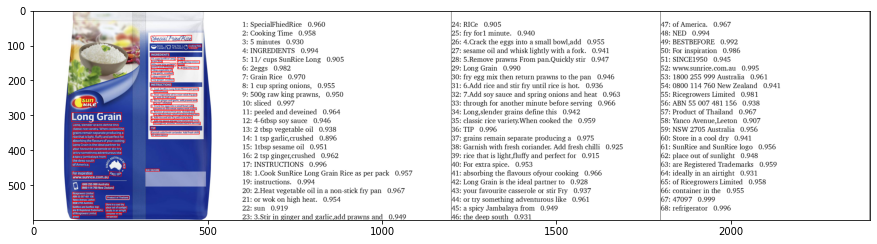

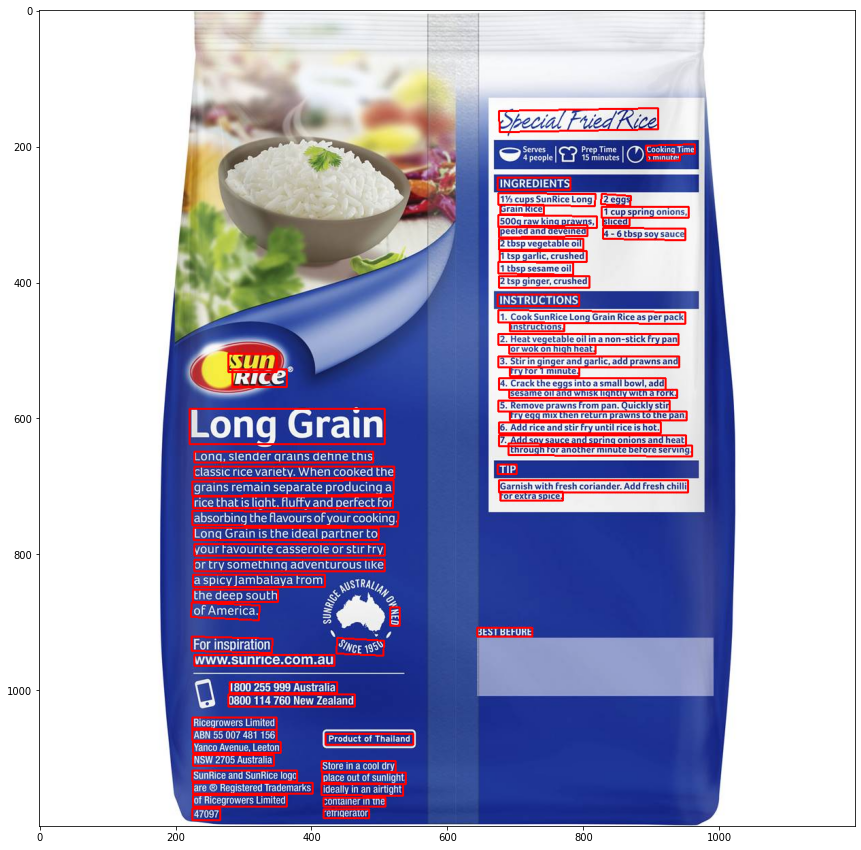

In [122]:
# Visualize our image and detections
# resizing display area
plt.figure(figsize=(15,15))

# draw annotations on image
annotated = draw_ocr(img, boxes, texts, scores, font_path=font_path) 

# show the image using matplotlib
plt.imshow(annotated) 
plt.figure(figsize=(15,15))

# draw annotations on image
annotated = draw_ocr(img, boxes, font_path=font_path) 

# show the image using matplotlib
plt.imshow(annotated) 

# Result message

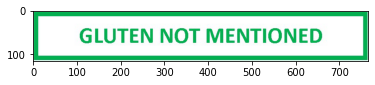

In [126]:
a=0
L=[]
for res in result:
    if 'gluten' in res[1][0]:
        a=1
        L.append(res[1][0])
if a!=0:
    imgcaution = mpimg.imread('caution gluten.jpg')
    plt.imshow(imgcaution)
    plt.show()
    #image = img.imread('caution gluten.jpg')
    #plt.imshow(image)
    #plt.show()
    print(colored('ALERT: MIGHT CONTAIN GLUTEN --- READ CARREFULLY THE FOLLOWING', 'red', attrs=['bold']))
    
    print(L)
else: 
    imgcaution = mpimg.imread('gluten safe.jpg')
    plt.imshow(imgcaution)
    plt.show()